<a href="https://www.kaggle.com/rahulkasaudhan/movie-recommendation-system-rrk411?scriptVersionId=88671032" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Movie Recommendation System

Recommendation System works on two methods:

1. Item Based Filtering - works on the principle of similar content. If a user is watching a movie, then the system will check about other movies of similar content or the same genre of the movie the user is watching. There are various fundamentals attributes that are used to compute the similarity while checking about similar content. 

2. Collaborative Filtering - work on the similarity between different users (based on users behaviour) and also items that are widely used as an e-commerce website and also online movie websites. It checks about the taste of similar users and does recommendations. 

3. Popularity-Based Recommendation System - works on the principle of popularity and or anything which is in trend. These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.

4. Classification Model - The model that uses features of both products as well as users to predict whether a user will like a product or not.



Here We will be using Content/Item based Filtering 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory-

In [2]:
column_names=["user_id","item_id","rating","timestamp"]
data=pd.read_csv('../input/movie-recommendation-dataset/u.data',sep='\t',names=column_names,encoding='latin-1')

In [3]:
data.head(5)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
data.shape

(100000, 4)

In [5]:
data.columns

Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')

In [6]:
data['user_id'].nunique()

943

In [7]:
data['item_id'].nunique()

1682

In [8]:
import warnings
warnings.filterwarnings("ignore")
movie_titles= pd.read_csv('../input/movie-recommendation-dataset/u.item',sep='\|' , header=None , encoding='latin-1')
#this file is separated by "|" pie 

In [9]:
movie_titles.shape

(1682, 24)

In [10]:
movie_titles=movie_titles[[0,1]]
movie_titles.columns=["item_id","title"]

In [11]:
movie_titles.shape

(1682, 2)

In [12]:
movie_titles.tail()

,item_id,title
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)
1681,1682,Scream of Stone (Schrei aus Stein) (1991)


In [13]:
data=pd.merge(data, movie_titles, on='item_id')

In [14]:
data.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


# Exploratory Data Analysis

In [15]:
import seaborn as sns;
sns.set_style('white')

In [16]:
data.groupby('title').mean()

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
...,...,...,...,...
Young Guns II (1990),504.068182,1188.0,2.772727,8.821855e+08
"Young Poisoner's Handbook, The (1995)",452.487805,547.0,3.341463,8.821438e+08
Zeus and Roxanne (1997),532.833333,1164.0,2.166667,8.775338e+08


In [17]:
data.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [18]:
data.groupby('title').count()['rating'].sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [19]:
ratings=pd.DataFrame(data.groupby('title').mean()['rating'])

In [20]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [21]:
 ratings['nums of rating']=pd.DataFrame(data.groupby('title').count()['rating'])

In [22]:
ratings.head()

,rating,nums of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


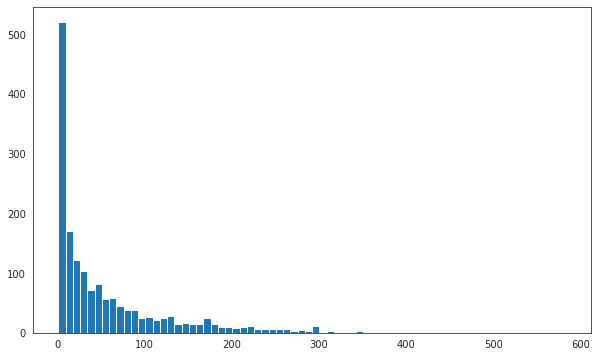

In [23]:
plt.figure(figsize=(10,6))
plt.hist(ratings['nums of rating'],bins=70)
plt.show()

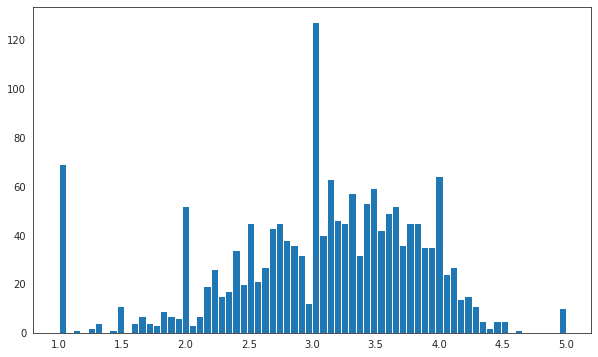

In [24]:
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'],bins=70)
plt.show()

In above histogram Data distribution is bell shaped i.e a Normal Distribution ,almost all dataset in real life are a normal distribution

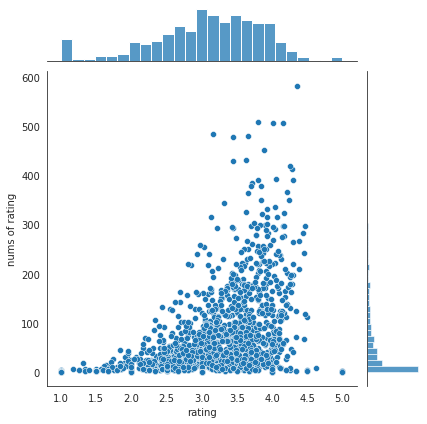

In [25]:
sns.jointplot(x='rating',y='nums of rating',data=ratings)

consider the case of "Star Wars' Movie which is rated by max users

# Creating Recommendation System

In [26]:
ratings.head()

,rating,nums of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [27]:
data.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [28]:
moviemat=data.pivot_table(index='user_id' , columns='title' , values='rating')

In [29]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [30]:
ratings.sort_values('nums of rating',ascending=False).head()

,rating,nums of rating
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [31]:
starwars_user_ratings=moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [32]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [33]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [34]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [35]:
corr_starwars.dropna(inplace=True)

In [36]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [37]:
corr_starwars.sort_values('Correlation' , ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [38]:
corr_starwars=corr_starwars.join(ratings['nums of rating'])

In [39]:
corr_starwars.head(10)

,Correlation,nums of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [40]:
corr_starwars[corr_starwars['nums of rating']>100].sort_values('Correlation' , ascending=False)

,Correlation,nums of rating
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


#  Prediction Function

In [41]:
def predict_movies(movie_name):
    movie_user_ratings=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie , columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['nums of rating'])
    predictions=corr_movie[corr_movie['nums of rating']>100].sort_values('Correlation' , ascending=False)
    return predictions

In [42]:
pred=predict_movies("Titanic (1997)")
pred.head()

,Correlation,nums of rating
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208


In [43]:
pred=predict_movies("Star Wars (1977)")
pred
pred.head(15)

,Correlation,nums of rating
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [44]:
pred=predict_movies("Kolya (1996)")
pred
pred.head(15)

,Correlation,nums of rating
title,,
Kolya (1996),1.000000,117
Happy Gilmore (1996),0.739950,149
Kingpin (1996),0.704529,162
Alien: Resurrection (1997),0.701990,124
What's Eating Gilbert Grape (1993),0.646358,115
Michael (1996),0.608581,119
"Postino, Il (1994)",0.606994,183
"Close Shave, A (1995)",0.605375,112
"Deer Hunter, The (1978)",0.594588,120
